In [6]:
data=[8,4,7]

In [70]:
%load_ext autoreload

In [71]:
%autoreload 2

In [7]:
data

[8, 4, 7]

In [8]:
type(data)

list

In [9]:
import random
random.randint(2,100)

95

In [48]:
N=5000

In [49]:
dict_data = {random.randint(1,N*2):'a' for x in range(N)}

In [12]:
#list_data = [random.randint(1,N*2) for x in range(N)]
list_data = list(dict_data.items())

In [13]:
list_data[0:8]

[(8428798, 'a'),
 (4429943, 'a'),
 (187705, 'a'),
 (3288344, 'a'),
 (2318130, 'a'),
 (3774949, 'a'),
 (1235030, 'a'),
 (5713227, 'a')]

In [14]:
%%time
data.get(4)

AttributeError: 'list' object has no attribute 'get'

In [15]:
%%time
4 in data

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 13.1 µs


True

### time it takes to lookup 100 items in seconds

In [16]:
def time_lookups(ds,num):
    import time
    start = time.time()
    for x in range(num):
        random.randint(1,N*2) in ds
    end = time.time()
    print(end - start)

In [46]:
time_lookups(list_data,100)

6.742733955383301


In [18]:
time_lookups(dict_data,10000) 

0.039563894271850586


In [19]:
from BTrees.IOBTree import IOBTree
btree_data = IOBTree()
btree_data.update(dict_data)

In [20]:
time_lookups(btree_data,10000)

0.04416227340698242


#### A comparison of time it took to lookup 100 data points from different datastructures

|*list* |*hash* | *Btree* |
|---- |---- |----  |
|6.742|0.039|0.044 |

In [21]:
import sys
sys.getsizeof(list_data)/1000000

35.397776

In [22]:
sys.getsizeof(dict_data)/1000000

167.772264

In [23]:
sys.getsizeof(btree_data)/1000000

0.000136

    This is a pure python BTree implementation by Mateor : https://gist.github.com/mateor/885eb950df7231f178a5

In [24]:
import mateor_Btree as mBtree

In [25]:
mBtree

<module 'mateor_Btree' from '/Users/shreyadutta/Dropbox/research_subject/mateor_Btree.py'>

In [26]:
mBtree_data = mBtree.BTree(20)

In [33]:
%%time
for x in range(1000000):
    mBtree_data.insert(random.randint(1,N*2))

CPU times: user 24.6 s, sys: 124 ms, total: 24.7 s
Wall time: 25 s


In [42]:
def time_lookups_mBtree(ds,num):
    import time
    start = time.time()
    for x in range(num):
        ds.search(random.randint(1,N*2))
    end = time.time()
    print(end - start)

In [45]:
time_lookups_mBtree(mBtree_data,10000)

0.4914991855621338


In [54]:
len(dict_data)

5000

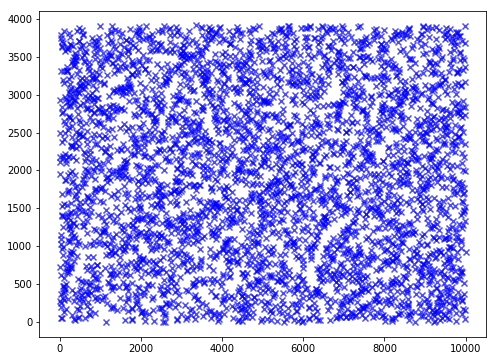

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
    
plt.scatter(dict_data.keys(), range(len(dict_data)), marker='x', 
            color='blue', alpha=0.7, label='x1 samples')

In [ ]:
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])

x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)

In [59]:
import urllib.request
import shutil
url = "http://www.stanmoreltd.co.uk/log/access.log"
file_name = "access.log"
# Download the file from `url` and save it locally under `file_name`:
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

use apache log parser to read access.log into memory https://medium.com/devops-challenge/apache-log-parser-using-python-8080fbc41dda

In [18]:
import re
from collections import Counter

def apache_log_reader(logfile):
    #myregex = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    myregex = r'\d{2}/.../\d{4}\:\d{2}\:\d{2}\:\d{2} \+\d{4}'
    #myregex = r'.*\[.+\]'
    with open(logfile) as f:
        log = f.readline()
        print(re.findall(myregex,log)[0])
        print(log)
#         my_iplist = re.findall(myregex,log)
#         ipcount = Counter(my_iplist)
#         for k, v in ipcount.items():
#            print("ts " + "=> " + str(k) + " " + "Count "  + "=> " + str(v))
apache_log_reader("access.log")

02/Jul/2014:14:35:55 +0100
151.227.152.48 - - [02/Jul/2014:14:35:55 +0100] "GET / HTTP/1.1" 200 3139 "-" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.153 Safari/537.36"



In [ ]:
import torch
N, D_in, H, D_out = 64, 1000, 100, 10

2014